In [ ]:
#Definir FUNCIÓN que me permitirá importar un archivo CSV y cargarlo en un DataFrame de pandas
def import_csv(file):
    # Read the csv file into a DataFrame: df con el paquete pandas
    import pandas as pd  #Python llama a paquetería pandas 
    return pd.read_csv(file)

In [ ]:
#Utilizar el nombre de la FUNCIÓN PREdefinida y la ruta de acceso (path) al archivo .csv de interés
import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [ ]:
#Definir una VARIABLE para poder manipular el DataFrame (no solo visualizarlo)
terminos_df = import_csv("C:/Projects/modelab_jp/data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

In [ ]:
terminos_df  #Visualizar el DataFrame

# 09 Mann-Whitney U test

In [ ]:
from scipy.stats import mannwhitneyu

#Crear una FUNCIÓN para realizar la prueba de Mann-Whitney U
def mann_whitney_test(data1, data2, alpha=0.05):
   
    """Performs the Mann-Whitney U test and prints U statistic, p-value, and result."""
    result = mannwhitneyu(data1, data2, alternative='two-sided')
    #Crear una f-string (permite insertar variables dentro del texto usando {}). Aquí, esto permite acceder a los ATRIBUTOS statistic y pvalue del OBJETO result
    print(f"U statistic = {result.statistic}")
    print(f"p-value = {result.pvalue}")
    
    #Crear una CONDICIONAL para interpretar el resultado. pvalue < 0.05 es estadisticamente significativo
    if result.pvalue < alpha:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")

In [46]:
terminos_df.columns  #Visualizar los nombres de las columnas del DataFrame

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

In [ ]:
#Importar las paqueterías necesarias (script original)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of TA by season
sns.boxplot(x='season', y='ta_micromol_kg', data=terminos_df) 
#sns.swarmplot(x='season', y='sal_psu', data=terminos_df, color=".25") 
# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()

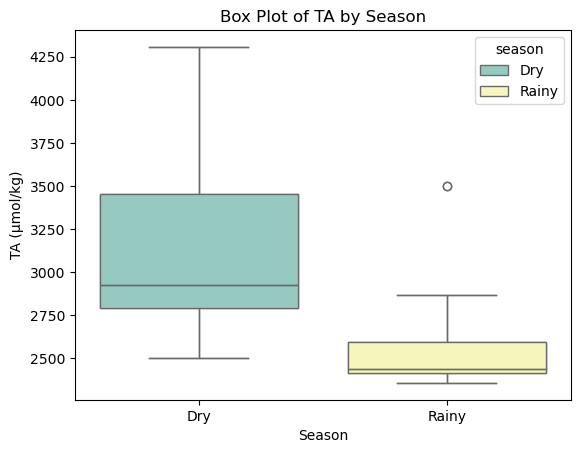

In [49]:
#Importar las paqueterías necesarias: modificado 1 (boxplot modificado)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of TA by season
sns.boxplot(x='season', y='ta_micromol_kg', data=terminos_df, palette="Set3", hue="season",legend=False) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
sns.boxplot(x='season', y='ta_micromol_kg', data=terminos_df, palette="Set3", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=True si quieres mostrar la leyenda.

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()

In [ ]:
#Importar las paqueterías necesarias: modificado 1.1 (con stripplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of TA by season
sns.stripplot(x='season', y='sal_psu', data=terminos_df, color=".25", size=3) #Agregar puntos individuales a la gráfica de caja (box plot), usando stripplot en lugar de swarmplot

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()

In [ ]:
#Importar las paqueterías necesarias: modificado 1.2 (con swarmplot)
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot of TA by season
sns.swarmplot(x='season', y='sal_psu', data=terminos_df, color=".25", size=3) #Agregar puntos individuales a la gráfica de caja (box plot), usando stripplot en lugar de swarmplot

# Add labels and title
plt.xlabel('Season')
plt.ylabel('TA (μmol/kg)')
plt.title('Box Plot of TA by Season')

# Show the plot
plt.show()

In [45]:
#Definir los 2 gupos de datos a comparar con Mann-Whitney U test    
#Filtrar datos de estación Dry 
ta_df_dry = terminos_df.loc[terminos_df["season"] == "Dry", "ta_micromol_kg"]
#Filtrar datos de estación Rainy
ta_df_rainy = terminos_df.loc[terminos_df["season"] == "Rainy","ta_micromol_kg"]

# Perform the Mann-Whitney U test for TA between dry and rainy seasons
mann_whitney_test(ta_df_dry, ta_df_rainy)

U statistic = 2251.5
p-value = 3.618607122062942e-12
The difference is statistically significant.


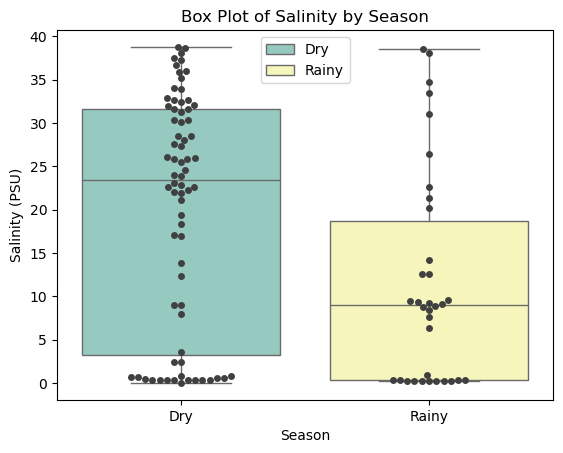

In [47]:

# Plot the box plot of salinity by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='sal_psu', data=terminos_df, palette="Set3", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
sns.swarmplot(x='season', y='sal_psu', data=terminos_df, color=".25")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.title('Box Plot of Salinity by Season')

# Show the plot
plt.show()

In [48]:
# Filter the salinity data by season
#Definir los 2 gupos de datos a comparar con Mann-Whitney U test    
# Filtrar datos de salinity por estación Dry 
sal_df_dry = terminos_df.loc[terminos_df["season"] == "Dry", "sal_psu"]
#Filtrar datos de salinity por estación Rainy
sal_df_rainy = terminos_df.loc[terminos_df["season"] == "Rainy","sal_psu"]

# Perform the Mann-Whitney U test for salinity between dry and rainy seasons
mann_whitney_test(sal_df_dry, sal_df_rainy)

U statistic = 1660.0
p-value = 0.003199701027350606
The difference is statistically significant.


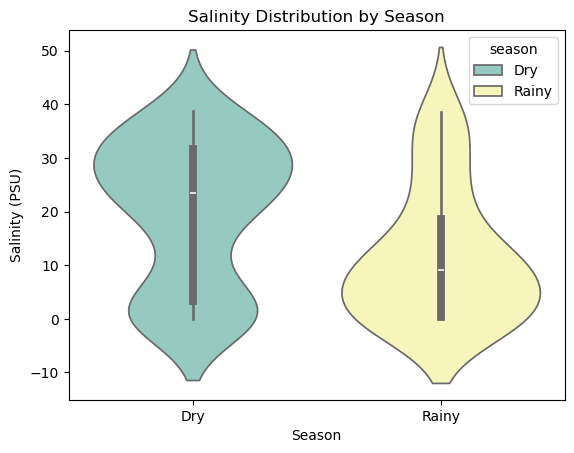

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot
sns.violinplot(x='season', y='sal_psu', data=terminos_df, palette="Set3", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.

plt.title('Salinity Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Salinity (PSU)')
plt.show()

# 09 Exercise: "Evaluate the Mann-Whitney U test for DIC and temperatura. Create boxplots and violin plots for these analyses."

#### 9.1 Exercise for the Mann-Whitney U test for DIC, boxplot and violin plot

In [51]:
terminos_df.columns  #Visualizar los nombres de las columnas del DataFrame

Index(['sample', 'date', 'estuary', 'area', 'station', 'layer_depth', 'season',
       'chlorophy_microg_l', 'cond_microsiemens_cm', 'depth_m',
       'do_percent_sat', 'do_mg_l', 'sal_psu', 'sp_cond_microsiemens_cm',
       'turbidity_fnu', 'temp_c', 'latitude', 'longitude', 'dic_micromol_kg',
       'ta_micromol_kg', 'dummy_data'],
      dtype='object')

In [ ]:
# 9.1.1 Filter the DIC data by season
dic_dry = terminos_df.loc[terminos_df["season"] == "Dry", "dic_micromol_kg"]
dic_rainy = terminos_df.loc[terminos_df["season"] == "Rainy", "dic_micromol_kg"]

# Perform the Mann-Whitney U test for DIC between dry and rainy seasons
mann_whitney_test(dic_dry, dic_rainy)

U statistic = 1942.5
p-value = 1.1746695070093673e-06
The difference is statistically significant.


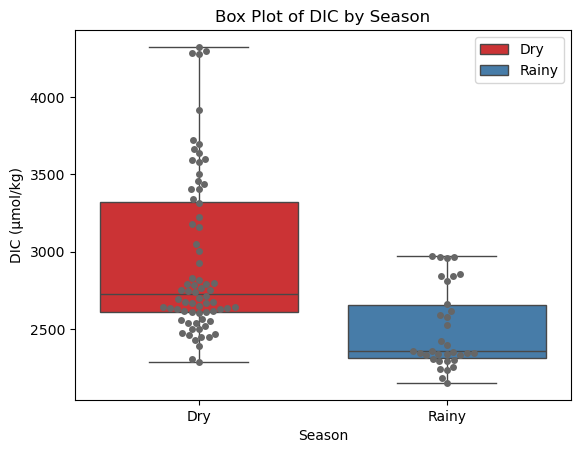

In [ ]:
# 9.1.2 Box plot of DIC by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='dic_micromol_kg', data=terminos_df, palette="Set1", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
sns.swarmplot(x='season', y='dic_micromol_kg', data=terminos_df, color="0.4")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.title('Box Plot of DIC by Season')

# Show the plot
plt.show()

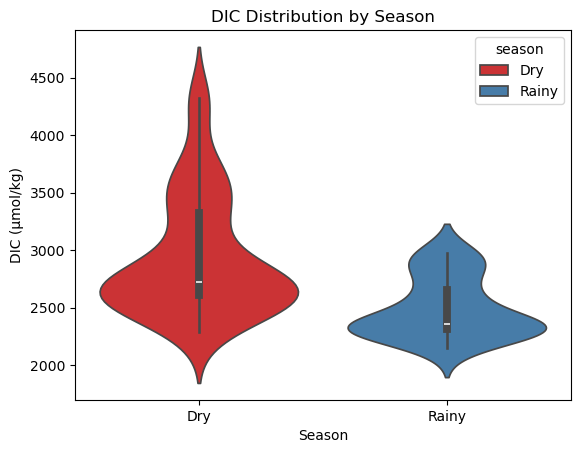

In [ ]:
#9.1.3 Violin plot of DIC by season
import seaborn as sns
import matplotlib.pyplot as plt


# Create a violin plot
sns.violinplot(x='season', y='dic_micromol_kg', data=terminos_df, palette="Set1", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.

plt.title('DIC Distribution by Season')
plt.xlabel('Season')
plt.ylabel('DIC (μmol/kg)')
plt.show()

#### 9.2 Mann-Whitney U test for temperature, boxplot and violin plot

In [70]:
# 9.2.1 Filter the Temperature data by season
temp_dry = terminos_df.loc[terminos_df["season"] == "Dry", "temp_c"]
temp_rainy = terminos_df.loc[terminos_df["season"] == "Rainy", "temp_c"]

# Perform the Mann-Whitney U test for Temperature between dry and rainy seasons
mann_whitney_test(temp_dry, temp_rainy)

U statistic = 551.0
p-value = 5.317160670684041e-06
The difference is statistically significant.


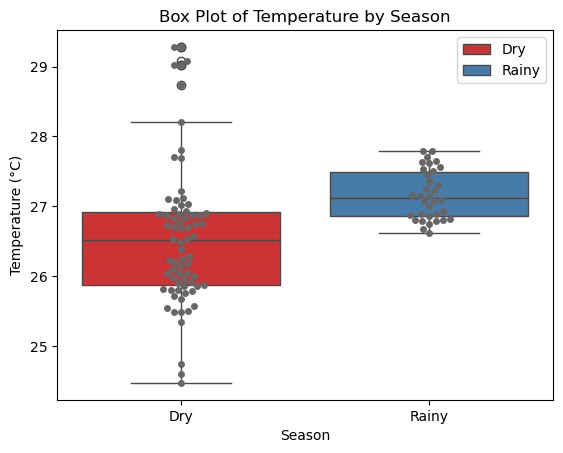

In [71]:
# 9.2.2 Box plot of Temperature by season
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
sns.boxplot(x='season', y='temp_c', data=terminos_df, palette="Set1", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.
sns.swarmplot(x='season', y='temp_c', data=terminos_df, color="0.4")

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.title('Box Plot of Temperature by Season')

# Show the plot
plt.show()

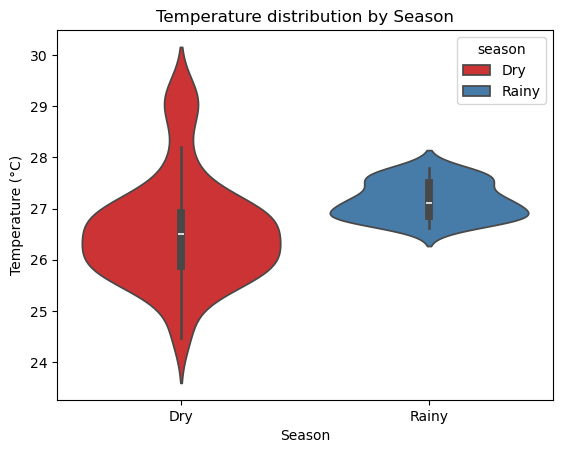

In [72]:
#9.2.3 Violin plot of DIC by season
import seaborn as sns
import matplotlib.pyplot as plt


# Create a violin plot
sns.violinplot(x='season', y='temp_c', data=terminos_df, palette="Set1", hue="season",legend=True) #Cada que se use el ARGUMENTO palette, se debe especificar el ARGUMENTO hue y agregar legend=False si no quieres mostrar la leyenda. Así el color se asigna correctamente por categoría.

plt.title('Temperature distribution by Season')
plt.xlabel('Season')
plt.ylabel('Temperature (°C)')
plt.show()